In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_csv('./data./train.csv')
test_df = pd.read_csv('./data./test.csv')

In [8]:
df

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252284,SESSION_252284,USER_206021,1.0,Chrome,Android,mobile,1,1.0,0.0,1,0.0,0.0,Europe,Northern Europe,United Kingdom,youtube.com,referral,NaN,Category5_Path_0032
252285,SESSION_252285,USER_206022,1.0,Chrome,Macintosh,desktop,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
252286,SESSION_252286,USER_164240,5.0,Chrome,Macintosh,desktop,0,2.0,69.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
252287,SESSION_252287,USER_206023,1.0,Android Webview,Android,mobile,1,1.0,28.0,0,0.0,0.0,Africa,Northern Africa,Egypt,youtube.com,referral,NaN,Category2_Path_0018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

- sessionID : 세션 ID
- userID : 사용자 ID
- TARGET : 세션에서 발생한 총 조회수
- browser : 사용된 브라우저
- OS : 사용된 기기의 운영체제
- device : 사용된 기기
- new : 첫 방문 여부 (0 : 첫 방문 아님, 1: 첫 방문)
- quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)
- duration : 총 세션 시간 (단위: 초)
- bounced : 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)
- transaction : 세션 내에서 발생의 거래의 수
- transaction_revenue : 총 거래 수익
- continent : 세션이 발생한 대륙
- subcontinent : 세션이 발생한 하위 대륙
- country : 세션이 발생한 국가
- traffic_source : 트래픽이 발생한 소스
- traffic_medium : 트래픽 소스의 매체
- keyword : 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정
- referral_path : traffic_medium이 referral인 경우 설정되는 경로

In [3]:
test_df

,sessionID,userID,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_252289,USER_206024,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
1,SESSION_252290,USER_206025,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
2,SESSION_252291,USER_206026,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category2_Path_0082
3,SESSION_252292,USER_206027,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
4,SESSION_252293,USER_206028,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category11_Path_0088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79781,SESSION_332070,USER_268999,Internet Explorer,Windows,tablet,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,search.xfinity.com,referral,NaN,Category1
79782,SESSION_332071,USER_269000,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
79783,SESSION_332072,USER_269001,Safari,Macintosh,desktop,1,1.0,22.0,0,0.0,0.0,Oceania,Australasia,Australia,google,organic,Category8,NaN
79784,SESSION_332073,USER_269002,Safari,iOS,mobile,1,1.0,135.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN


In [4]:
df['OS'].value_counts()

OS
Windows             88119
Macintosh           60316
Android             51870
iOS                 29778
Linux                9562
Chrome OS            9222
(not set)            2592
Tizen                 321
Samsung               259
Windows Phone         128
OS/2                   36
Xbox                   31
BlackBerry             29
Playstation Vita        9
Nintendo 3DS            6
Firefox OS              4
FreeBSD                 3
SunOS                   1
Nintendo WiiU           1
SymbianOS               1
Nokia                   1
Name: count, dtype: int64

In [5]:
df['browser'].value_counts()

browser
Chrome                                                  174395
Safari                                                   35689
Android Webview                                          13855
Firefox                                                   8436
Internet Explorer                                         4573
                                                         ...  
eosutpkiahjzvdgcwxlmyfqbrn                                   1
;__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;         1
wvsmagudcqeytijorlhxnfzkbp                                   1
efkaxnbyohqtspzlvcwrjmigdu                                   1
NokiaC7-00                                                   1
Name: count, Length: 70, dtype: int64

- ;__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59; 같은 건 결측치인가...?
- 1개짜리를 전부 결측치로 인식하는게 나을까?

In [6]:
df['device'].value_counts()

device
desktop    167133
mobile      76460
tablet       8696
Name: count, dtype: int64

In [7]:
df['keyword'].value_counts()

keyword
Category8                103584
Category9                  3488
Category11                 1931
Category10                 1147
Category6_Keyword_003       634
                          ...  
Category2_Keyword_273         1
Category1_Keyword_271         1
Category3_Keyword_270         1
Category4_Keyword_269         1
Category4_Keyword_617         1
Name: count, Length: 623, dtype: int64

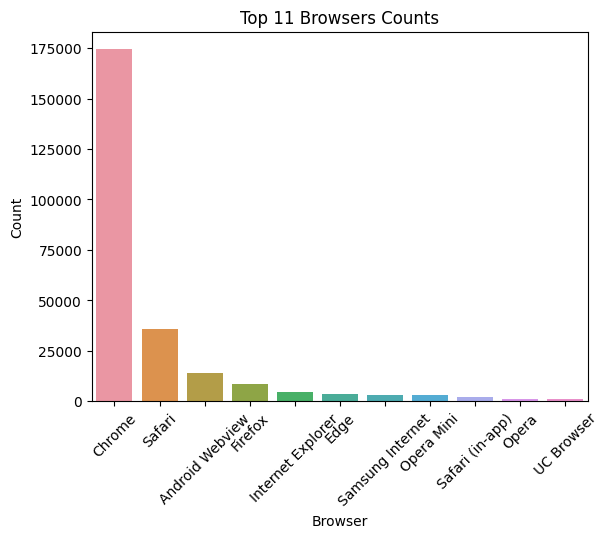

In [5]:
browser_counts = df['browser'].value_counts()

# 상위 11개 브라우저 선택
top_11_browsers = browser_counts.head(11)

# Seaborn의 countplot을 사용하여 막대 그래프 그리기
sns.barplot(x=top_11_browsers.index, y=top_11_browsers.values)

# X 축 레이블 회전
plt.xticks(rotation=45)

# 그래프 제목과 축 레이블 설정
plt.title('Top 11 Browsers Counts')
plt.xlabel('Browser')
plt.ylabel('Count')

# 그래프 표시
plt.show()

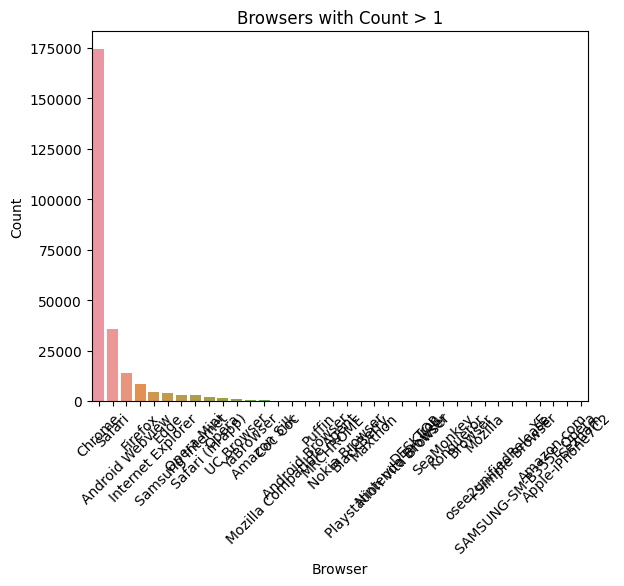

In [6]:
browser_counts = df['browser'].value_counts()

# count가 1 초과인 브라우저만 선택
filtered_browsers = browser_counts[browser_counts > 1]

# Seaborn의 countplot을 사용하여 막대 그래프 그리기
sns.barplot(x=filtered_browsers.index, y=filtered_browsers.values)

# X 축 레이블 회전
plt.xticks(rotation=45)

# 그래프 제목과 축 레이블 설정
plt.title('Browsers with Count > 1')
plt.xlabel('Browser')
plt.ylabel('Count')

# 그래프 표시
plt.show()

In [7]:
# count가 1 초과인 브라우저만 선택
filtered_browsers = browser_counts[browser_counts > 1]
filtered_browsers

browser
Chrome                      174395
Safari                       35689
Android Webview              13855
Firefox                       8436
Internet Explorer             4573
Edge                          3702
Samsung Internet              3077
Opera Mini                    3041
Safari (in-app)               1995
Opera                         1331
UC Browser                     901
YaBrowser                      402
Amazon Silk                    257
Coc Coc                        206
Mozilla Compatible Agent       124
Android Browser                110
Puffin                          55
MRCHROME                        15
Nokia Browser                   13
BlackBerry                      13
Maxthon                         11
Playstation Vita Browser         9
Nintendo Browser                 7
DESKTOP                          5
Iron                             4
SeaMonkey                        4
Konqueror                        3
Browser                          3
Mozilla     

In [9]:
df['traffic_source'].value_counts()

traffic_source
google                  116007
(direct)                 59026
youtube.com              52871
analytics.google.com      7609
Partners                  5369
                         ...  
google.ie                    1
qc.search.yahoo.com          1
earth.google.com             1
br.search.yahoo.com          1
calendar.google.com          1
Name: count, Length: 168, dtype: int64

In [8]:
# 'traffic_source' 컬럼 값 변경
df.loc[df['traffic_source'].str.contains('google'), 'traffic_source'] = 'google'
df['traffic_source'].value_counts()

traffic_source
google              129271
(direct)             59026
youtube              52888
Partners              5369
facebook               747
                     ...  
cz.pinterest.com         1
kidrex.org               1
mail1.swic.edu           1
de.wow.com               1
feedly.com               1
Name: count, Length: 76, dtype: int64

In [7]:
# 'traffic_source' 컬럼 값 변경
df.loc[df['traffic_source'].str.contains('youtube'), 'traffic_source'] = 'youtube'
df['traffic_source'].value_counts()

traffic_source
google                  116007
(direct)                 59026
youtube                  52888
analytics.google.com      7609
Partners                  5369
                         ...  
google.pl                    1
images.google.com.br         1
google.pt                    1
cz.pinterest.com             1
calendar.google.com          1
Name: count, Length: 135, dtype: int64

In [6]:
# 'traffic_source' 컬럼 값 변경
df.loc[df['traffic_source'].str.contains('yahoo'), 'traffic_source'] = 'yahoo'
df['traffic_source'].value_counts()

traffic_source
google                  116007
(direct)                 59026
youtube.com              52871
analytics.google.com      7609
Partners                  5369
                         ...  
google.pl                    1
images.google.com.br         1
google.pt                    1
cz.pinterest.com             1
calendar.google.com          1
Name: count, Length: 137, dtype: int64

In [6]:
source_counts = df['traffic_source'].value_counts()
# count가 1 초과인 traffic_source만 선택
filtered_sources = source_counts[source_counts > 10]
filtered_sources

traffic_source
google                   129283
(direct)                  59026
youtube                   52876
Partners                   5369
bing                        704
reddit.com                  681
qiita.com                   548
quora.com                   503
baidu                       460
dfa                         436
away.vk.com                 379
yahoo                       301
facebook.com                265
m.facebook.com              265
blog.golang.org             186
l.facebook.com              177
dealspotr.com                93
lunametrics.com              81
duckduckgo.com               75
t.co                         64
linkedin.com                 45
sashihara.jp                 44
int.search.tb.ask.com        39
aulagrado.esic.edu           36
lm.facebook.com              35
outlook.live.com             31
online-metrics.com           26
ask                          25
pinterest.com                21
l.messenger.com              17
phandroid.com            

In [3]:
# 'traffic_source' 컬럼 값 변경
df.loc[df['traffic_source'].str.contains('facebook'), 'traffic_source'] = 'facebook'
df['traffic_source'].value_counts()

traffic_source
google                  116007
(direct)                 59026
youtube.com              52871
analytics.google.com      7609
Partners                  5369
                         ...  
google.jo                    1
google.ie                    1
qc.search.yahoo.com          1
earth.google.com             1
calendar.google.com          1
Name: count, Length: 162, dtype: int64

In [4]:
source_counts = df['traffic_source'].value_counts()
# count가 1 초과인 traffic_source만 선택
filtered_sources = source_counts[source_counts > 10]
filtered_sources

traffic_source
google                         116007
(direct)                        59026
youtube.com                     52871
analytics.google.com             7609
Partners                         5369
sites.google.com                 2507
google.com                       1222
facebook                          747
bing                              704
reddit.com                        681
qiita.com                         548
quora.com                         503
mail.google.com                   480
baidu                             460
dfa                               436
away.vk.com                       379
groups.google.com                 315
plus.url.google.com               298
support.google.com                242
yahoo                             214
blog.golang.org                   186
dealspotr.com                      93
lunametrics.com                    81
productforums.google.com           76
duckduckgo.com                     75
google.co.jp                       

In [9]:
df.isnull().sum()

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

In [10]:
test_df.isnull().sum()

sessionID                  0
userID                     0
browser                    0
OS                         0
device                     0
new                        0
quality                    0
duration                   0
bounced                    0
transaction                0
transaction_revenue        0
continent                  0
subcontinent               0
country                    0
traffic_source             0
traffic_medium             0
keyword                43070
referral_path          53891
dtype: int64

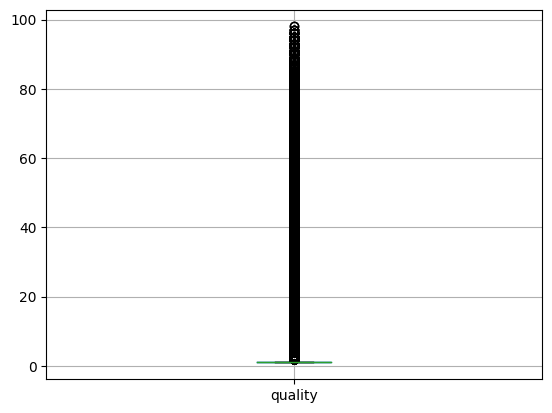

In [9]:
df.boxplot(column='quality')

# 그래프를 화면에 출력
plt.show()

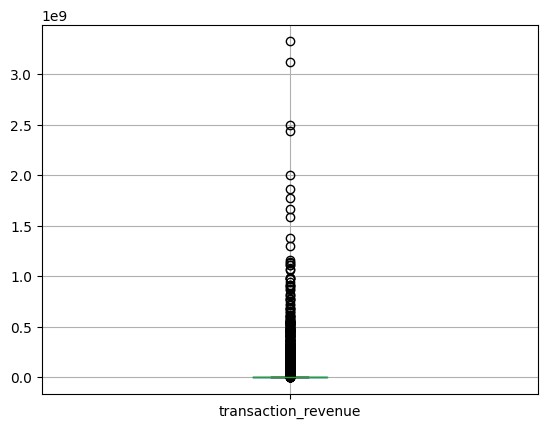

In [10]:
df.boxplot(column='transaction_revenue')

# 그래프를 화면에 출력
plt.show()